In [1]:
library(readr)
library(dplyr)
library(randomForest)
library(Hmisc)
library(party)
library(data.table)
library(ggplot2)
library(plyr)
library(dplyr)
library(corrplot)
library(pROC)
library(glmnet)
library(caret)
library(Rtsne)
library(doMC)
library("ROSE")
library(class)
library(naivebayes)
library(ROCR)
library(rpart)
library(ranger)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin


Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zo

In [2]:
data <- read.csv("creditcard.csv")


In [3]:
index <- sample(2,nrow(data),prob = c(0.7,0.3),replace = TRUE)


In [4]:
train <- data[index==1,]
test <- data[index==2,]

In [5]:
glimpse(train)

Observations: 198,833
Variables: 31
$ Time   <dbl> 0, 0, 1, 2, 4, 7, 9, 10, 11, 12, 12, 12, 13, 14, 18, 22, 23,...
$ V1     <dbl> -1.3598071, 1.1918571, -1.3583541, -1.1582331, 1.2296576, -0...
$ V2     <dbl> -0.07278117, 0.26615071, -1.34016307, 0.87773675, 0.14100351...
$ V3     <dbl> 2.53634674, 0.16648011, 1.77320934, 1.54871785, 0.04537077, ...
$ V4     <dbl> 1.3781552, 0.4481541, 0.3797796, 0.4030339, 1.2026127, -0.49...
$ V5     <dbl> -0.338320770, 0.060017649, -0.503198133, -0.407193377, 0.191...
$ V6     <dbl> 0.46238778, -0.08236081, 1.80049938, 0.09592146, 0.27270812,...
$ V7     <dbl> 0.239598554, -0.078802983, 0.791460956, 0.592940745, -0.0051...
$ V8     <dbl> 0.098697901, 0.085101655, 0.247675787, -0.270532677, 0.08121...
$ V9     <dbl> 0.36378697, -0.25542513, -1.51465432, 0.81773931, 0.46495999...
$ V10    <dbl> 0.09079417, -0.16697441, 0.20764287, 0.75307443, -0.09925432...
$ V11    <dbl> -0.551599533, 1.612726661, 0.624501459, -0.822842878, -1.416...
$ V12    <dbl> -

In [6]:
table(train$Class)
table(test$Class)


     0      1 
198499    334 


    0     1 
85816   158 

In [7]:
library("ROSE")

In [8]:
data.rose <- ROSE(Class ~ ., data = train, seed = 1,N = 40000)$data
table(data.rose$Class)


    0     1 
20086 19914 

In [9]:
attach(data.rose)

In [10]:
summary(data.rose)

      Time               V1                 V2                 V3          
 Min.   :-128581   Min.   :-43.4407   Min.   :-35.0921   Min.   :-56.3446  
 1st Qu.:  44340   1st Qu.: -4.1569   1st Qu.: -0.7395   1st Qu.: -5.6409  
 Median :  86605   Median : -0.6745   Median :  0.7899   Median : -1.0025  
 Mean   :  88406   Mean   : -2.3536   Mean   :  1.7571   Mean   : -3.4501  
 3rd Qu.: 132857   3rd Qu.:  1.4164   3rd Qu.:  3.2824   3rd Qu.:  0.8523  
 Max.   : 303433   Max.   : 18.3661   Max.   : 28.0585   Max.   : 19.4970  
       V4                V5                 V6                 V7          
 Min.   :-8.9280   Min.   :-33.3354   Min.   :-18.6758   Min.   :-52.3465  
 1st Qu.:-0.3827   1st Qu.: -2.7114   1st Qu.: -1.8839   1st Qu.: -4.2767  
 Median : 1.2915   Median : -0.4752   Median : -0.6475   Median : -0.5467  
 Mean   : 2.2437   Mean   : -1.5815   Mean   : -0.6991   Mean   : -2.6647  
 3rd Qu.: 4.4688   3rd Qu.:  1.0323   3rd Qu.:  0.4843   3rd Qu.:  0.7516  
 Max.   :18.

In [11]:
summary(test)

      Time              V1                  V2                  V3           
 Min.   :     1   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.32559  
 1st Qu.: 54411   1st Qu.: -0.91470   1st Qu.: -0.60390   1st Qu.: -0.89313  
 Median : 85012   Median :  0.02034   Median :  0.06350   Median :  0.18210  
 Mean   : 94891   Mean   : -0.00674   Mean   : -0.00633   Mean   : -0.00327  
 3rd Qu.:139250   3rd Qu.:  1.31600   3rd Qu.:  0.80387   3rd Qu.:  1.03006  
 Max.   :172784   Max.   :  2.45189   Max.   : 22.05773   Max.   :  9.38256  
       V4                  V5                   V6           
 Min.   :-5.683171   Min.   :-113.74331   Min.   :-26.16051  
 1st Qu.:-0.855184   1st Qu.:  -0.69631   1st Qu.: -0.76710  
 Median :-0.017782   Median :  -0.05850   Median : -0.27214  
 Mean   :-0.000016   Mean   :  -0.00687   Mean   :  0.00189  
 3rd Qu.: 0.742712   3rd Qu.:   0.61619   3rd Qu.:  0.39845  
 Max.   :16.715537   Max.   :  34.80167   Max.   : 73.30163  
       V7           

In [12]:
library("SuperLearner")


Loading required package: nnls
Super Learner
Version: 2.0-24
Package created on 2018-08-10



In [13]:
    y <- data.rose$Class
    ytest <- test$Class



In [14]:
    x <- data.frame(data.rose[,1:30])
    xtest <- data.frame(test[,1:30])

In [15]:
    listWrappers()


All prediction algorithm wrappers in SuperLearner:



 [1] "SL.bartMachine"      "SL.bayesglm"         "SL.biglasso"        
 [4] "SL.caret"            "SL.caret.rpart"      "SL.cforest"         
 [7] "SL.dbarts"           "SL.earth"            "SL.extraTrees"      
[10] "SL.gam"              "SL.gbm"              "SL.glm"             
[13] "SL.glm.interaction"  "SL.glmnet"           "SL.ipredbagg"       
[16] "SL.kernelKnn"        "SL.knn"              "SL.ksvm"            
[19] "SL.lda"              "SL.leekasso"         "SL.lm"              
[22] "SL.loess"            "SL.logreg"           "SL.mean"            
[25] "SL.nnet"             "SL.nnls"             "SL.polymars"        
[28] "SL.qda"              "SL.randomForest"     "SL.ranger"          
[31] "SL.ridge"            "SL.rpart"            "SL.rpartPrune"      
[34] "SL.speedglm"         "SL.speedlm"          "SL.step"            
[37] "SL.step.forward"     "SL.step.interaction" "SL.stepAIC"         
[40] "SL.svm"              "SL.template"         "SL.xgboost"         



All screening algorithm wrappers in SuperLearner:



[1] "All"
[1] "screen.corP"           "screen.corRank"        "screen.glmnet"        
[4] "screen.randomForest"   "screen.SIS"            "screen.template"      
[7] "screen.ttest"          "write.screen.template"


set.seed(150)
    single.model <- SuperLearner(y,
                                 x,
                                 family=binomial(),
                                 SL.library=list("SL.ranger"))

single.model

In [16]:
set.seed(1)
sl = SuperLearner(Y = y, X = x, family = binomial(),
                  SL.library = c("SL.svm", "SL.bayesglm", "SL.randomForest"))
sl

Loading required package: arm
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: lme4

Attaching package: 'lme4'

The following object is masked from 'package:modeltools':

    refit


arm (Version 1.10-1, built: 2018-4-12)

Working directory is E:/Softwares/anaconda


Attaching package: 'arm'

The following object is masked from 'package:corrplot':

    corrplot

Loading required package: e1071

Attaching package: 'e1071'

The following object is masked from 'package:Hmisc':

    impute

Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warning message:
"fitted probabilities numerically 0 or 1 occurred"Warn


Call:  
SuperLearner(Y = y, X = x, family = binomial(), SL.library = c("SL.svm",  
    "SL.bayesglm", "SL.randomForest")) 


                          Risk Coef
SL.svm_All          0.03058127    0
SL.bayesglm_All     0.05601964    0
SL.randomForest_All 0.00456709    1

In [17]:
sl$times$everything


    user   system  elapsed 
12813.46    10.77 12825.44 

In [18]:
pred = predict(sl, test, onlySL = T, type=class)


In [19]:
str(pred)


List of 2
 $ pred           : num [1:85974, 1] 0 0 0 0 0 0 0 0 0.002 0 ...
 $ library.predict: num [1:85974, 1:3] 0 0 0 0 0 0 0 0 0 0 ...


In [20]:
summary(pred$library.predict)


       V1          V2          V3         
 Min.   :0   Min.   :0   Min.   :0.00000  
 1st Qu.:0   1st Qu.:0   1st Qu.:0.00000  
 Median :0   Median :0   Median :0.00000  
 Mean   :0   Mean   :0   Mean   :0.01032  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0.00000  
 Max.   :0   Max.   :0   Max.   :1.00000  

In [ ]:
pred = predict(sl, test, onlySL = T, type=class)


Area under the curve (AUC): 0.949

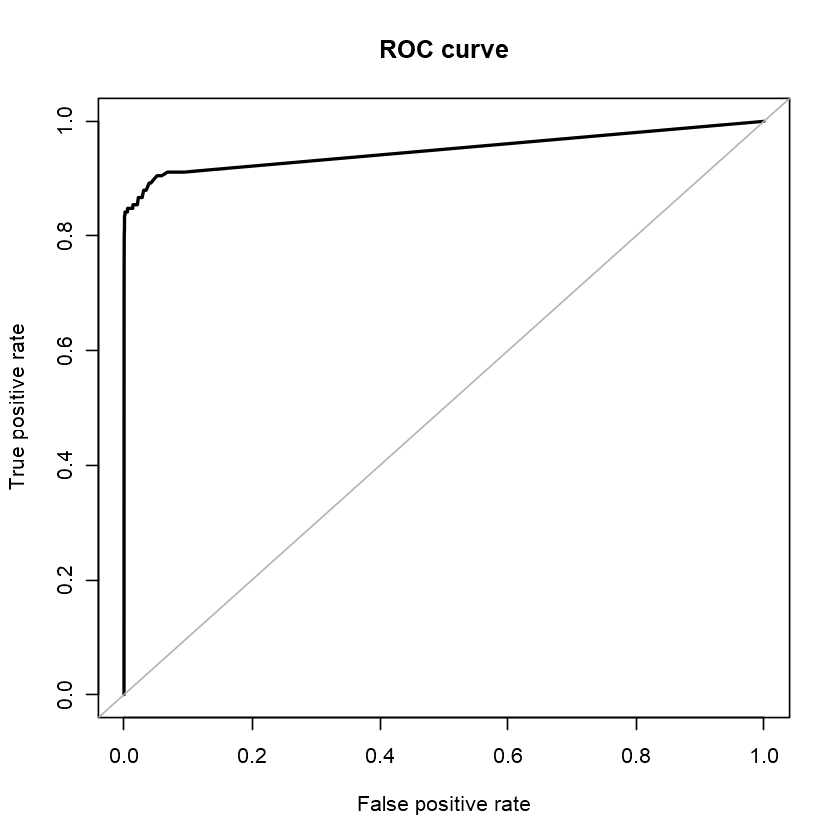

In [21]:
roc.curve(test$Class, pred$pred, plotit = T)
